# Exercise 2
Repeat Exercise 1 for your own project and data

### Qa)
Plot the distribution Star. Also, find the spread, average and median.



In [1]:
import sys,os
sys.path.append(os.path.expanduser('./ProjectFunctions'))
from ProjectFunctions import LoadFunc as Func

star = Func.getStar()
#circle = Func.getCircle()
triangle = Func.getTriangle()
# square = Func.getSquare()


In [2]:
import pylab as pult
from PIL import Image
import cv2

#Methods of displaying

pult.imshow(star[1])

im = Image.fromarray(star[1])
display(im)

IndexError: list index out of range

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

m1 = []
s1 = []
v1 = []
med1 = []

for x in range(len(star)):
    m1.append(np.mean(star[x]))
    s1.append(np.std(star[x]))
    v1.append(np.var(star[x]))
    med1.append(np.median(star[x]))
    
    
    
# Uncomment below, to see Mean, Standardard Deviation, Variation and Median of each picture in Cat0 Dataset
    
print('Average of star = ', m1)
# print('Standard Deviation of star = ', s1)
# print('Variation of star =', v1)
print('Median of star = ', med1)

Average of star =  [228.781675, 228.9453, 228.97005, 228.6021, 219.31525, 219.505575, 220.159975, 220.006325, 220.256725, 219.747325, 219.371325, 219.701175, 219.6886, 219.13905, 228.56545, 219.206775, 219.632325, 220.552075, 220.483075, 220.248075, 219.8574, 219.92285, 219.64935, 218.964525, 219.1144, 228.588225, 218.9233, 219.676075, 219.5216, 219.4994, 219.545725, 220.200725, 220.315, 220.042425, 219.975875, 219.7283, 228.69315, 219.688175, 219.67235, 220.007525, 220.215425, 220.041075, 219.76865, 219.9318, 219.72075, 220.0343, 219.2816, 228.562175, 219.40605, 219.901875, 219.814925, 219.4201, 219.940375, 220.234125, 219.956275, 220.66245, 220.329725, 220.641425, 228.634825, 219.776175, 220.09205, 220.7169, 220.2385, 220.41415, 219.973175, 220.06945, 219.609825, 219.5085, 219.31475, 228.50925, 219.75985, 219.403075, 220.306825, 220.464, 220.4891, 221.01285, 220.2874, 219.9501, 220.270775, 219.933775, 228.551025, 220.07475, 219.651825, 219.583275, 219.820375, 220.20125, 220.1089, 219

### Qb)
Is there a difference in median and mean in star?
Which of these two describes the the star the best?


THe median takes the middle value in list of ascending or descending order, while the mean is the average of all values in the image.
FOr most scenarios the median would describe most data the best due to outliers in datasets, but for this dataset, this is not the case. This dataset consists of images with value from 0-255, which describes the colours. So a median would either take 255 or 0, which doesn't describe the image at all.
While mean doesn't really say much about the image it still is able to describe the differences in each image. If a shape has more darker ridges or is shaped weirdly compared to the previous, we are able to see there is a difference do to the changing in mean.


### Qc)
Fit a normal distribution of the data and plot a histogram - does the two fit?


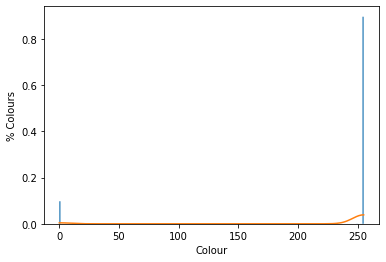

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

#density line
density = stats.gaussian_kde(star[1].flatten())

samples, histo, _ = plt.hist(star[1].flatten(), bins=256, histtype='stepfilled', density=True)
plt.plot(histo, density(histo))
plt.xlabel('Colour')
plt.ylabel('% Colours')
plt.show()

The histogram does not fit a normal distribution, which is expected. As the images consists of shapes coloured in black and a white background, the histogram, doesn't have many values to work with. Therefor as seen, the histogram only displays the values distributed between black and white, which is why we only see two pillars.

### Qd)
Is there a link between Star and Triangle? Make correlation plot



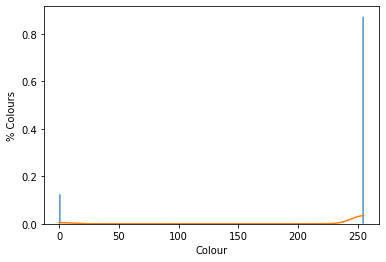

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


#A histogram of image Cat0[2] is shown to, review the colour distribution
#density line
density = stats.gaussian_kde(triangle[1].flatten())

samples, histo, _ = plt.hist(triangle[1].flatten(), bins=256, histtype='stepfilled', density=True)
plt.plot(histo, density(histo))
plt.xlabel('Colour')
plt.ylabel('% Colours')
plt.show()

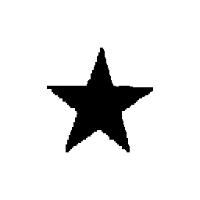

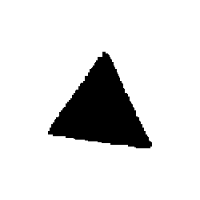

In [6]:
#human evaluation of images

im = Image.fromarray(star[1])
display(im)


im2 = Image.fromarray(triangle[1])
display(im2)

Text(0, 0.5, 'circle[1]')

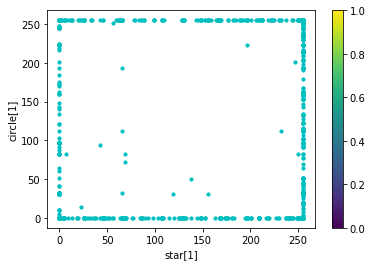

In [8]:
#plotting the scatter plot

plt.figure()
plt.scatter(star[1], triangle[1], s=10, c="c", cmap="paired")
plt.colorbar()

plt.xlabel('star[1]')
plt.ylabel('circle[1]')

As seen on earlier histograms, the results were quite unimpressive and so would it be expected for the scatter plot as well.
The scatter plot compares each pixel to pixel for each image, so a result of this scatter plot does not say anything about the correlation, and since each pixel is only 0 or 255, there isn't much correlation to identify.

This can also be seen on the scatterplot. The scatterplot can't show any correlation between those to, since there basicly aren't any. As an example, a scatter plot could be used to show the correlation between income and material value of a family. Images of shapes doesn't have a correlation, since firstly it's an image, and secondly shapes doesn't tend to have a correlation between other shapes.

### Qe)
What is the 5% and 95% percentages of star? (i.e. the limits for 5% lowest and highest). Also, plot the distribution of star.
Comment on the realism of the max-value and 95% percentile - suggest a solution for this issue, if more realistic data was desired





In [9]:
Meanstar = np.mean(star[1])
SDstar = np.std(star[1])
Medstar = np.median(star[1])

print('The Average of Cat0[1] = ', Meanstar)
print('\nThe standard deviation of Cat0[1] = ', SDstar)
print('\nThe median of Cat0[1] = ',Medstar)

The Average of Cat0[1] =  228.9453

The standard deviation of Cat0[1] =  76.5283532941223

The median of Cat0[1] =  255.0


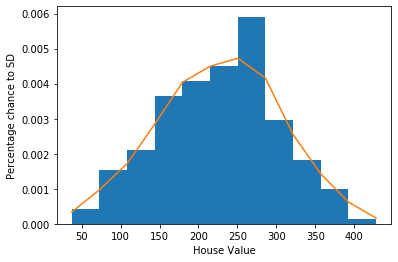

In [10]:
Distribution = np.random.normal(Meanstar, SDstar, len(star[1]))
#density line
density = stats.gaussian_kde(Distribution)


samples, histo, _ = plt.hist(Distribution, bins='fd', density=True)

plt.plot(histo, density(histo))
plt.xlabel('Star')
plt.ylabel('Percentage chance to SD')
plt.show()

In [11]:
Percent95 = np.percentile(histo, 95)
print(Percent95)
Percent5 = np.percentile(histo, 5)
print(Percent5)


408.62945350898923
56.817670356900805


The normal distribution for this is not quite right, while the biggest chance is 255, it says there are chances of having a value between 0-255 and 255-410, which it can't, since the images only consists of black and white.

### Conclusion
It can be concluded that this type of analysis is not well suited for image datasets. The median, mean, standard deviation, histogram and etc. doesn't say much about the images as images can be unpredictable. We could imagine images to have tons of outliers as the colour scheme can change drasticly from each quadrant of an image. 
While this analysis is good starting point for dataset, it would not be recommended to apply it on image datasets.